REPEATED MEASURES DESIGNS (skip 102-118)
===============================
each subject is measured at every level for that factor  

For example, 
if a runner is timed running on two different track surfaces, we are considering "surface" as a repated measure factor

One-factor experiment
------------------------
each subject is given each of the four drugs  
H_0: mean(1)=mean(2)=mean(3)=mean(4)

In [3]:
DATA PAIN;
SUBJ+1;
DO DRUG=1 TO 4;
INPUT PAIN @;
OUTPUT;
END;
DATALINES;
5 9 6 11
7 12 8 9
11 12 10 14
3 8 5 8
;

proc print data=pain(obs=5);
run;

Obs,SUBJ,DRUG,PAIN
1,1,1,5
2,1,2,9
3,1,3,6
4,1,4,11
5,2,1,7


PROC ANOVA DATA=PAIN;
CLASS SUBJ DRUG;
MODEL PAIN=SUBJ DRUG;
MEANS DRUG/DUNCAN;
RUN;


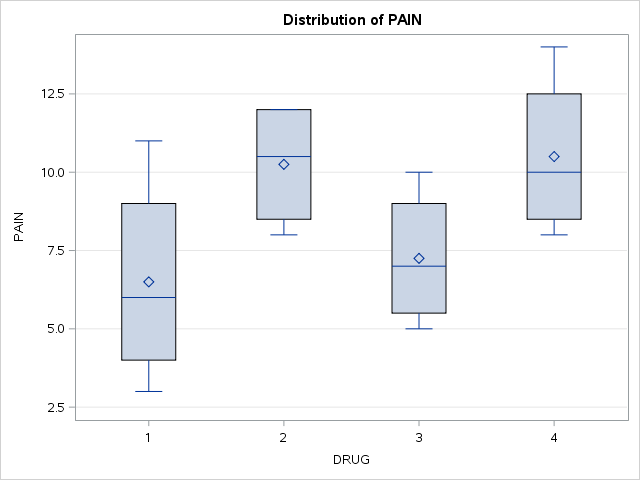

In [5]:
PROC ANOVA DATA=PAIN;
CLASS SUBJ DRUG;
MODEL PAIN=SUBJ DRUG;
MEANS DRUG/DUNCAN;
RUN;

H_0 reject, proceed to Ducan test
===========================================
DRUG F value of 11.38 with p=.002, we reject H_0 that means are equal  
higher mean = greater pain, so DRUG 1 & 3 is more effective in reducing pain  

Looking at ERROR SS(13.25) and SUBJ SS(70.25)
had this been 16 subjects to the four different drugs (instead of repeated measure, ERROR SS would have been 83.5 (13.25+70.25). The resulting F and p for DRUG would have been 2.41 and .118 (Note that the degrees of freedom for the error term would be 12 instead of 9.)

REPEATED of PROC ANOVA
===========================
Since there is no CLASS, we have nothing for right of equals sign in MODEL stmt  
NOUNI: no univariate for analysis of 4 PAIN  
REPEATED: (repeated factor) (levels for repeated factor) (labes for each level)  


In [8]:

DATA REPEAT1;
INPUT PAIN1-PAIN4;
DATALINES;
5 9 7 11
7 12 8 9
11 12 10 14
3 8 5 8
;

PROC ANOVA DATA=REPEAT1;
MODEL PAIN1-PAIN4 = / NOUNI;
REPEATED DRUG 4 (1 2 3 4);
RUN;

we cannot use MEANS stmt with REPEATED
==============================================
use CONTRAST(level): CONTRAST(1) compare control to each of other drugs, if we want all pairwise contrasts we need k-1 REPEATED stmt (k = number of level in repeated factor)  
NOM: no multivariate statistics be printed  
SUMMARY: requests ANOVA table for each contrast defined by the repeated factor.  


In [10]:

PROC ANOVA DATA=REPEAT1;
MODEL PAIN1-PAIN4 = / NOUNI;
REPEATED DRUG 4 CONTRAST(1)/NOM SUMMARY; *give us 1 vs 2,3,4;
REPEATED DRUG 4 CONTRAST(2)/NOM SUMMARY; *give us 2 vs 1,3,4;
REPEATED DRUG 4 CONTRAST(3)/NOM SUMMARY;
RUN;